# San Francisco Bike Share

## Cassie & James

-----------------

In [7]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import seaborn as sns
from shapely.geometry import Point, LineString
import time

%matplotlib inline

mpl.rcParams['figure.figsize'] = 10,10      #set the default map size
mpl.rcParams['patch.linewidth'] = 0.5       #set default polygon line width
mpl.rcParams['markers.fillstyle'] = 'full'  #set default polygon line width

In [8]:
# Directories & Data Paths
top_directory = "/Users/jgaboardi/Desktop/Exercise_2/"
raw_data = "/raw_data"
half_1 = "/201402_babs_open_data"
half_2 = "/201408_babs_open_data"
trips_1 = "/201402_trip_data.csv"
trips_2 = "/201408_trip_data.csv"
stations_1 = "/201402_station_data.csv"
stations_2 = "/201408_station_data.csv"
bay_area = "/bayarea_cities/bay_area_cities.shp"
san_jose_area = "/bayarea_cities/San_Jose.shp"
clean_data = "/clean_data"

In [9]:
# Bay Area Shapes
bay_area_cities = gpd.read_file(top_directory+raw_data+bay_area)
del bay_area_cities["Length__"]
# No Water
bay_area_cities = bay_area_cities[bay_area_cities.CITY != "BAY AND OCEAN"]

# Bay Area Shapes
san_jose = gpd.read_file(top_directory+raw_data+san_jose_area)
del san_jose["INCORP_ID"]
san_jose.columns = ["Area__", "CITY", "geometry"]

# Concatenate San Jose to other cites
bay_area_cities = pd.concat([bay_area_cities, san_jose])

# To File
#bay_area_cities.to_file(top_directory+clean_data+"/bay_area_cities.shp")
bay_area_cities.head()

,Area__,CITY,geometry
0,6.920507e+07,ALAMEDA,"POLYGON ((6062440.659978311 2099431.509882029,..."
1,3.979002e+08,ALAMO,"POLYGON ((6142769.436757123 2132420.992920753,..."
2,3.704884e+07,ALBANY,"POLYGON ((6045760.679930776 2154419.699629241,..."
3,1.240215e+08,ALVISO,"POLYGON ((6133654.370380634 1993194.999575089,..."
4,6.931341e+08,AMERICAN CANYON,"POLYGON ((6072029.630483241 2267404.510230466,..."


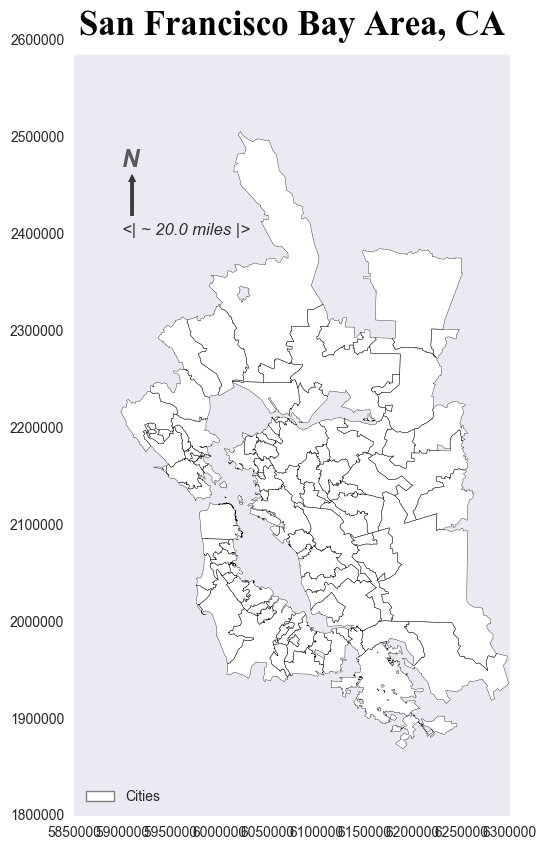

In [10]:
# Set color for polygons
color = ListedColormap('white')

# Plot
bay_area_cities.plot(alpha=1,
                     colormap=color,
                     linewidth=.25)

# Title
plt.title('San Francisco Bay Area, CA', 
          family='Times New Roman', 
          size=25, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')
plt.grid(False)

# Legend Handles
cities = mpatches.Patch(facecolor='white',
                        edgecolor='gray', 
                        lw=1, 
                        label='Cities')

# Legend
plt.legend(handles=[cities], 
           numpoints=1, 
           loc="lower left")

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
plt.annotate('N', xy=(5900000, 2470000), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
plt.arrow(5910000, 2420000, 0.0, 35000, width=3000, head_width=7250, 
          head_length=7500, fc='k', ec='k',alpha=0.75,)
plt.annotate('<| ~ 20.0 miles |>', xy=(5900000, 2400000), 
             fontstyle='italic', fontsize='large', alpha=0.95)

#plt.savefig(top_directory+clean_data+"/bay_area.png")

# Stations

In [11]:
# Initial Coords
wgs = {'init': 'epsg:4326', 'no_defs': True}

# Merge Station Data
half_1_stations = pd.read_csv(top_directory+raw_data+half_1+stations_1)
half_2_stations = pd.read_csv(top_directory+raw_data+half_2+stations_2)

# The 2nd half only has one new station so we concatenate that
frames = [half_1_stations, half_2_stations[half_2_stations.index == 69]]
whole_year_stations = pd.concat(frames)
# Add Geometry
geometry = [Point(xy) for xy in zip(whole_year_stations["long"], whole_year_stations["lat"])]
whole_year_stations = gpd.GeoDataFrame(whole_year_stations, geometry=geometry, crs=wgs)
whole_year_stations = whole_year_stations.to_crs(epsg=2227)
print "Number of stations: ", len(whole_year_stations)
# To File
#whole_year_stations.to_file(top_directory+clean_data+"/whole_year_stations.shp")
whole_year_stations.head()

Number of stations:  70


,station_id,name,lat,long,dockcount,landmark,installation,geometry
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,POINT (6154108.436713739 1945582.578486792)
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,POINT (6157835.76413645 1945878.7618813)
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,POINT (6156131.696261932 1947102.142265964)
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,POINT (6156612.529994125 1946158.036943278)
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,POINT (6156387.222703378 1948093.539909093)


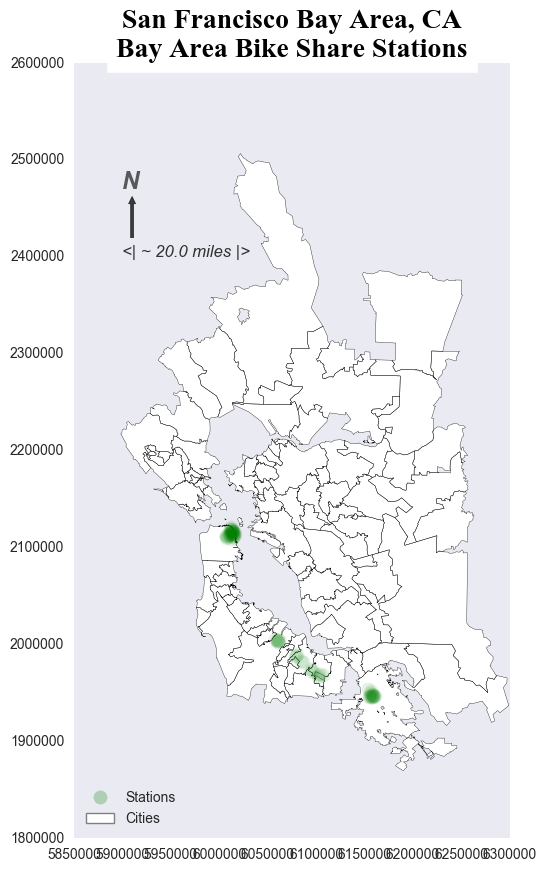

In [12]:
# Base
base = bay_area_cities.plot(legend=True,
                            colormap=color,
                            alpha=1,
                            linewidth=.25)
# Stations
whole_year_stations.plot(ax=base, 
                         marker='o', 
                         color='green', 
                         markersize=10, 
                         alpha=.1,
                         label="Stations")
# Title
plt.title('San Francisco Bay Area, CA\nBay Area Bike Share Stations', 
          family='Times New Roman', 
          size=20, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')
plt.grid(False)

# Legend Handles
cities = mpatches.Patch(facecolor='white', 
                        edgecolor='gray', 
                        lw=1, 
                        label='Cities')
stations = mlines.Line2D([], [],
                         color='green', 
                         marker='o',
                         markersize=10, 
                         label='Stations', 
                         alpha=.25, 
                         linestyle='None')
# Legend
plt.legend(handles=[stations, cities], 
           numpoints=1, 
           loc="lower left", 
           shadow=True, 
           fancybox=True)

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
plt.annotate('N', xy=(5900000, 2470000), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
plt.arrow(5910000, 2420000, 0.0, 35000, width=3000, head_width=7250, 
          head_length=7500, fc='k', ec='k',alpha=0.75,)
plt.annotate('<| ~ 20.0 miles |>', xy=(5900000, 2400000), 
             fontstyle='italic', fontsize='large', alpha=0.95)

#plt.savefig(top_directory+clean_data+"/bay_area_and_stations.png")

# Our Relevant Extent

In [13]:
# Filter out the cities with bike share stations
sf_bikes = bay_area_cities[bay_area_cities.CITY == "SAN FRANCISCO"]
redwood_bikes = bay_area_cities[bay_area_cities.CITY == "PALO ALTO"]
palo_alto_bikes = bay_area_cities[bay_area_cities.CITY == "MOUNTAIN VIEW"]
mountainview_bikes = bay_area_cities[bay_area_cities.CITY == "REDWOOD CITY"]
san_jose_bikes = bay_area_cities[bay_area_cities.CITY == "San Jose"]

# Concatenate
bike_share_area = pd.concat([sf_bikes,redwood_bikes,palo_alto_bikes,mountainview_bikes,san_jose_bikes])
#bike_share_area.to_file(top_directory+clean_data+"/bike_share_area.shp")

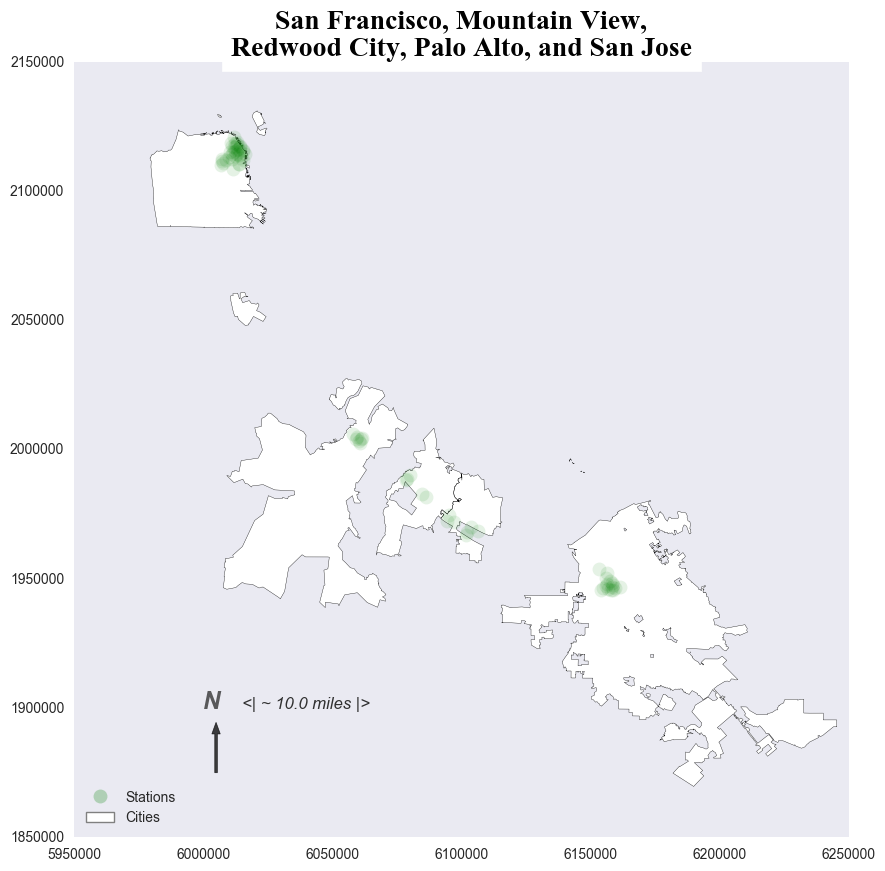

In [14]:
# Base
base = bike_share_area.plot(legend=True,
                            colormap=color,
                            alpha=1,
                            linewidth=.25)
# Stations
whole_year_stations.plot(ax=base, 
                         marker='o', 
                         color='green', 
                         markersize=10, 
                         alpha=.1,
                         label="Stations")
# Title
plt.title('San Francisco, Mountain View,\nRedwood City, Palo Alto, and San Jose', 
          family='Times New Roman', 
          size=20, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')
plt.grid(False)

# Legend Handles
cities = mpatches.Patch(facecolor='white', 
                        edgecolor='gray', 
                        lw=1, 
                        label='Cities')
stations = mlines.Line2D([], [],
                         color='green', 
                         marker='o',
                         markersize=10, 
                         label='Stations', 
                         alpha=.25, 
                         linestyle='None')
# Legend
plt.legend(handles=[stations, cities], 
           numpoints=1, 
           loc="lower left", 
           shadow=True, 
           fancybox=True)

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
plt.annotate('N', xy=(6000000, 1900000), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
plt.arrow(6005000, 1875000, 0.0, 15000, width=1000, head_width=3250, 
          head_length=4500, fc='k', ec='k',alpha=0.75,)
plt.annotate('<| ~ 10.0 miles |>', xy=(6015000, 1900000), 
             fontstyle='italic', fontsize='large', alpha=0.95)

#plt.savefig(top_directory+clean_data+"/share_cities_and_stations.png")

In [15]:
# Merge Trip Data
half_1_trips = pd.read_csv(top_directory+raw_data+half_1+trips_1)
half_2_trips = pd.read_csv(top_directory+raw_data+half_2+trips_2)

# Inconsistent Naming Conventions for 'Subscription Type' Column
# Must rename so halves match
half_2_trips = half_2_trips.rename(columns = {'Subscriber Type':'Subscription Type'})

# Concatenate the halves
frames = [half_1_trips, half_2_trips]
whole_year_trips = pd.concat(frames)
print "Length of whole equal to the combined halfs?",\
      len(whole_year_trips) == len(half_1_trips)\
      + len(half_2_trips)
print len(whole_year_trips)

# To File
#whole_year_trips.to_csv(top_directory+clean_data+"/whole_year_trips.csv")
whole_year_trips.head()

Length of whole equal to the combined halfs? True
315807


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [16]:
# Merge Trip and Station Station Data by Start Station
start_station_merge = whole_year_trips.merge(whole_year_stations, 
                                             how='right',
                                             left_on=whole_year_trips["Start Station"],
                                             right_on=whole_year_stations.name)

# Convert Start Date to 'datetime' and set to index
start_station_merge["Start_Date"] = pd.to_datetime(start_station_merge["Start Date"])
del start_station_merge["Start Date"]
start_station_merge["End_Date"] = pd.to_datetime(start_station_merge["End Date"])
del start_station_merge["End Date"]
start_station_merge.index = start_station_merge["Start_Date"]
#start_station_merge.to_csv(top_directory+clean_data+"/start_station_merge.csv")
#http://chrisalbon.com/python/pandas_time_series_basics.html

In [17]:
start_station_merge.head()[:2]

,Trip ID,Duration,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id,name,lat,long,dockcount,landmark,installation,geometry,Start_Date,End_Date
Start_Date,,,,,,,,,,,,,,,,,,,
2013-08-29 14:13:00,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 14:13:00,2013-08-29 14:14:00
2013-08-29 12:02:00,4299,83,South Van Ness at Market,66,Market at 10th,67,319,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 12:02:00,2013-08-29 12:04:00


--------------------

# Count of Trips by Month $ \Longrightarrow \# 1 $

In [18]:
start_station_merge['Trip'] = [1]*len(start_station_merge)
count_by_month = start_station_merge['Trip'].groupby(pd.TimeGrouper("M")).sum()
count_by_month.to_csv(top_directory+clean_data+"/count_by_month.csv")
count_by_month

Start_Date
2013-08-31     2102
2013-09-30    25243
2013-10-31    29105
2013-11-30    24219
2013-12-31    19894
2014-01-31    24428
2014-02-28    19024
2014-03-31    24064
2014-04-30    25589
2014-05-31    27735
2014-06-30    29247
2014-07-31    30503
2014-08-31    30461
Freq: M, Name: Trip, dtype: int64

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.]), <a list of 8 Text yticklabel objects>)

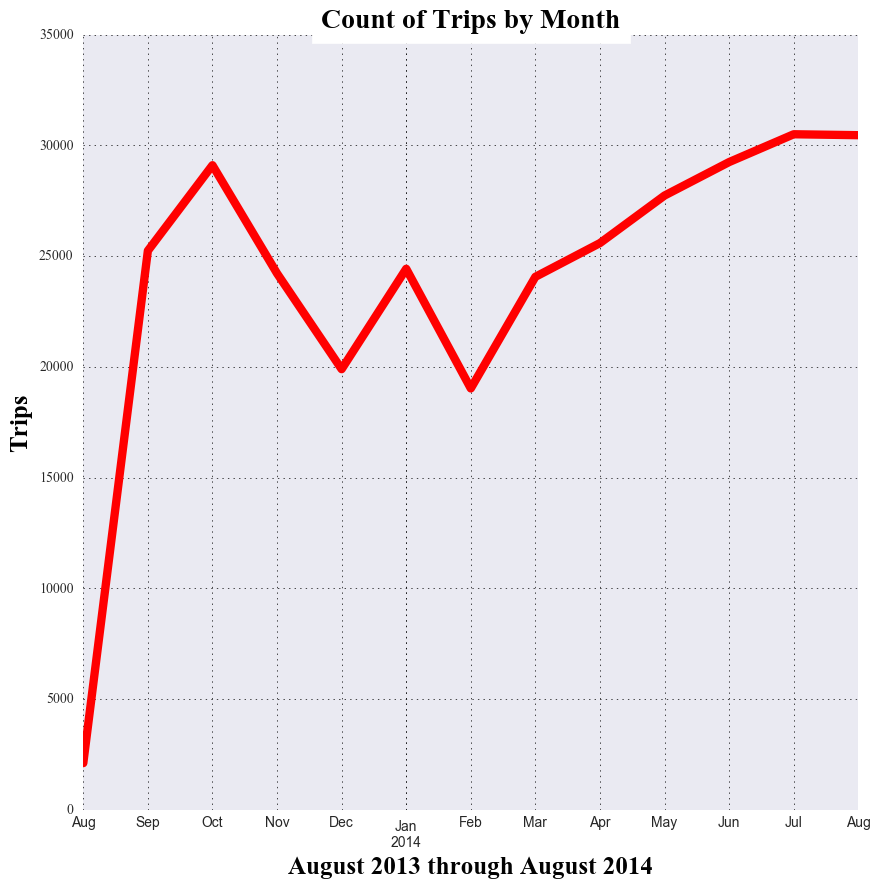

In [19]:
# Plot
count_by_month.plot(linestyle='-',
                    lw=6,
                    color='r')

# Title
plt.title('Count of Trips by Month', 
          family='Times New Roman', 
          size=20, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')
# Grid
plt.grid(color='k', 
         which='both',
         axis='both', 
         lw=.5, 
         linestyle=':')

# X-Label
plt.xlabel("August 2013 through August 2014",
           family='Times New Roman', 
           size=18, 
           color='k', 
           backgroundcolor='w', 
           weight='bold')

# Y-Label
plt.ylabel("Trips",
           family='Times New Roman', 
           size=18, 
           color='k', 
           backgroundcolor='w', 
           weight='bold')
# y-ticks
plt.yticks(family='Times New Roman')

#plt.savefig(top_directory+clean_data+"/count_by_month.png")

# Count of Trips by Hour of Day $ \Longrightarrow \# 1 $

In [20]:
start_station_merge['Trip'] = [1]*len(start_station_merge)
count_by_hour = start_station_merge['Trip'].groupby(start_station_merge.index.hour).sum()
#count_by_hour.to_csv(top_directory+clean_data+"/count_by_hour.csv")
count_by_hour.head()

0    1148
1     671
2     400
3     182
4     381
Name: Trip, dtype: int64

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.]), <a list of 9 Text yticklabel objects>)

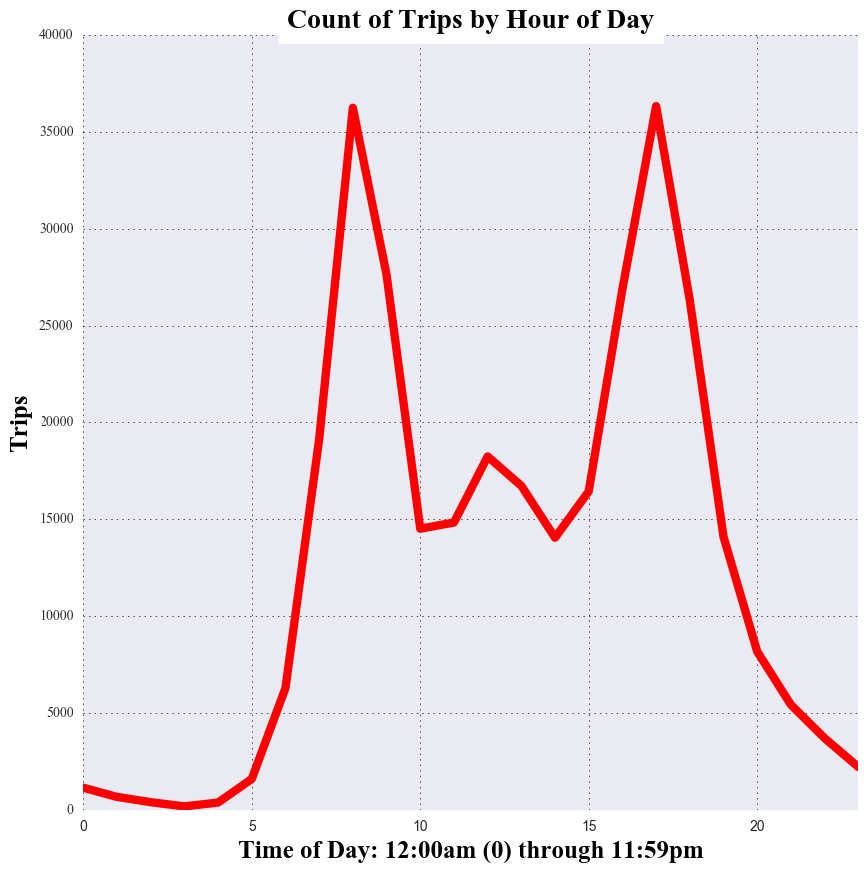

In [21]:
# Plot
count_by_hour.plot(linestyle='-',
                    lw=6,
                    color='r')

# Title
plt.title('Count of Trips by Hour of Day', 
          family='Times New Roman', 
          size=20, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

# Grid
plt.grid(color='k', 
         which='both', 
         axis='both',
         lw=.5, 
         linestyle=':')
# X-Label
plt.xlabel("Time of Day: 12:00am (0) through 11:59pm",
           family='Times New Roman', 
           size=18, 
           color='k', 
           backgroundcolor='w', 
           weight='bold')
# Y-Label
plt.ylabel("Trips",
           family='Times New Roman', 
           size=18, 
           color='k', 
           backgroundcolor='w', 
           weight='bold')

# y-ticks
plt.yticks(family='Times New Roman')

#plt.savefig(top_directory+clean_data+"/count_by_hour.png")

----------------------

# OD Matrices

In [22]:
# OD Start Index __ Name
origin_destination_by_start__NAME = start_station_merge[["Start Station",
                                                   "End Station"]]\
                              .pivot_table(index=["Start Station"],
                                           columns=["End Station"], 
                                           aggfunc=len, 
                                           fill_value=0,
                                           margins=True,
                                           margins_name="Totals")
origin_destination_by_start__NAME.columns.name = "Destination"
origin_destination_by_start__NAME.index.name = "Origin"
#origin_destination_by_start__NAME.to_csv(top_directory\
#                                         +clean_data\
#                                         +"/origin_destination_by_start__NAME.csv")

In [23]:
origin_destination_by_start__NAME[["2nd at Folsom", 
                                   "2nd at South Park", 
                                   "2nd at Townsend"]].head()[:3]

Destination,2nd at Folsom,2nd at South Park,2nd at Townsend
Origin,,,
2nd at Folsom,119.0,405.0,379.0
2nd at South Park,223.0,241.0,138.0
2nd at Townsend,318.0,120.0,403.0


In [24]:
# OD Start Index __ Terminal
origin_destination_by_start__TERMINAL = start_station_merge[["Start Terminal",
                                                   "End Terminal"]]\
                              .pivot_table(index=["Start Terminal"],
                                           columns=["End Terminal"], 
                                           aggfunc=len, 
                                           dropna=False,
                                           fill_value=0,
                                           margins=True,
                                           margins_name="Totals")
origin_destination_by_start__TERMINAL.columns.name = "Destination"
origin_destination_by_start__TERMINAL.index.name = "Origin"
#origin_destination_by_start__TERMINAL.to_csv(top_directory\
#                                             +clean_data\
#                                             +"/origin_destination_by_start__TERMINAL.csv")

# OD Matrix by Terminal

In [25]:
origin_destination_by_start__TERMINAL[[2,3,4]].head()[:3]

Destination,2,3,4
Origin,,,
2,114.0,166.0,968.0
3,172.0,202.0,77.0
4,1069.0,56.0,93.0


In [26]:
print origin_destination_by_start__NAME.shape
print origin_destination_by_start__TERMINAL.shape

(71, 74)
(71, 71)


In [27]:
print origin_destination_by_start__TERMINAL['Totals'].head()[:3]
print len(origin_destination_by_start__TERMINAL['Totals'])

Origin
2    4590.0
3     820.0
4    1903.0
Name: Totals, dtype: float64
71


--------------------

# Count by Origin $ \Longrightarrow \# 2 $

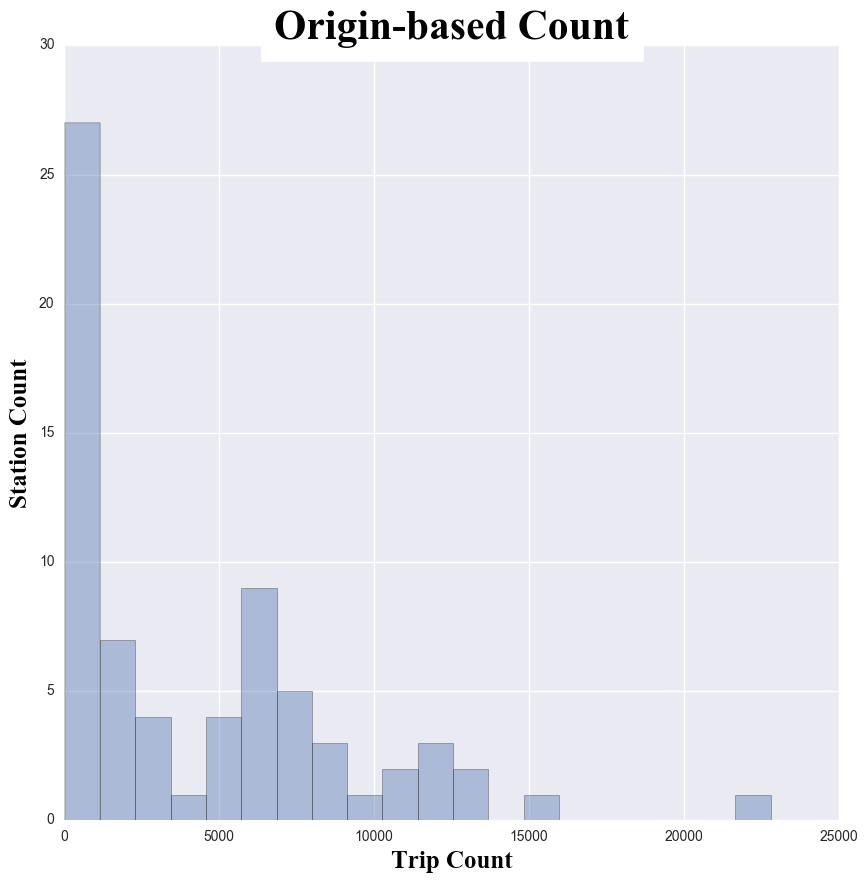

In [28]:
originCount_for_histogram = origin_destination_by_start__TERMINAL\
                            [origin_destination_by_start__TERMINAL.index != "Totals"]

#originCount_for_histogram.to_csv(top_directory\
#                                 +clean_data\
#                                 +"/originCount_for_histogram.csv")    
    
sns.distplot(originCount_for_histogram["Totals"], 
             bins=20, 
             kde=False)

# Title
plt.title('Origin-based Count', 
          family='Times New Roman', 
          size=30, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

plt.xlabel('Trip Count', 
          family='Times New Roman', 
          size=18, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

plt.ylabel('Station Count', 
          family='Times New Roman', 
          size=18, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

#plt.savefig(top_directory+clean_data+"/count_by_origin.png")

# Count by Destination $ \Longrightarrow \# 2 $

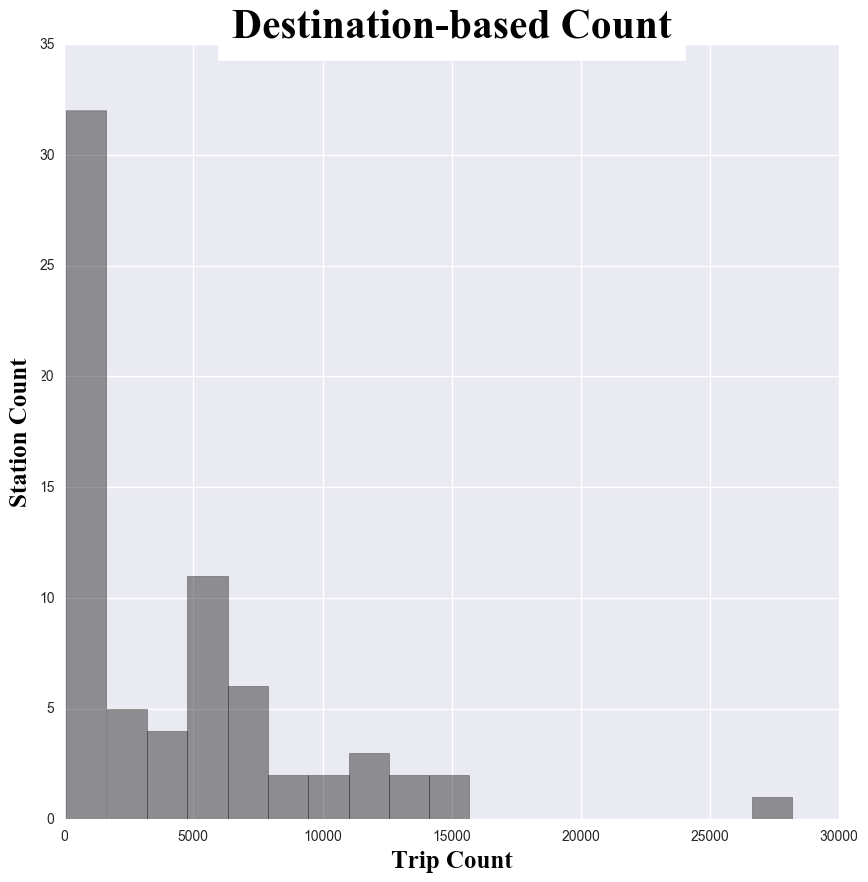

In [29]:
destination_origin_by_start__TERMINAL = origin_destination_by_start__TERMINAL.transpose()
destinationCount_for_histogram = destination_origin_by_start__TERMINAL\
                            [destination_origin_by_start__TERMINAL.index != "Totals"]

#destinationCount_for_histogram.to_csv(top_directory\
#                                      +clean_data\
#                                      +"/destinationCount_for_histogram.csv")
    
sns.distplot(destinationCount_for_histogram["Totals"],
             bins=18,
             kde=False,
             color='k')
# Title
plt.title('Destination-based Count', 
          family='Times New Roman', 
          size=30, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

plt.xlabel('Trip Count', 
          family='Times New Roman', 
          size=18, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

plt.ylabel('Station Count', 
          family='Times New Roman', 
          size=18, 
          color='k', 
          backgroundcolor='w', 
          weight='bold')

#plt.savefig(top_directory+clean_data+"/count_by_destination.png")

------------------------

# Weight Counts for Mapping Usage$ \Longrightarrow \#3 $

In [30]:
# Create new Weights dataframe to merge with stations in QGIS
weight_counts_df = pd.DataFrame(index=origin_destination_by_start__TERMINAL.index[:-1])
weight_counts_df["Start_Terminal"] = weight_counts_df.index
weight_counts_df['Origin_Weights'] = origin_destination_by_start__TERMINAL['Totals'][:-1]
weight_counts_df['Destination_Weights'] = destination_origin_by_start__TERMINAL['Totals'][:-1]
weight_counts_df['OD_Difference'] = weight_counts_df['Origin_Weights']\
                                    - weight_counts_df['Destination_Weights']

# Save to File
#weight_counts_df.to_csv(top_directory\
#                        +clean_data\
#                        +"/weight_counts_df.csv")

------------------

# Weight Counts BY TIME for Mapping Usage$ \Longrightarrow \#6 $

In [31]:
# 7am to 9am Origins and Destinations
AM_7_to_9 = start_station_merge.between_time('7:00','9:00')
AM_7_to_9.to_csv(top_directory+clean_data+'/AM_7_to_9.csv')
AM_7_to_9.head()[:2]

,Trip ID,Duration,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id,name,lat,long,dockcount,landmark,installation,geometry,Start_Date,End_Date,Trip
Start_Date,,,,,,,,,,,,,,,,,,,,
2013-08-30 08:27:00,5168,352,South Van Ness at Market,66,Powell Street BART,39,409,Subscriber,94117,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-30 08:27:00,2013-08-30 08:33:00,1
2013-08-30 07:44:00,5138,453,South Van Ness at Market,66,Market at 4th,76,622,Customer,NaN,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-30 07:44:00,2013-08-30 07:51:00,1


In [32]:
# AM OD Start Index __ Terminal
AM_OD_by_start = AM_7_to_9[["Start Terminal",
                            "End Terminal"]]\
                            .pivot_table(index=["Start Terminal"],
                                         columns=["End Terminal"], 
                                         aggfunc=len, 
                                         dropna=False,
                                         fill_value=0,
                                         margins=True,
                                         margins_name="Totals")
AM_OD_by_start.columns.name = "Destination"
AM_OD_by_start.index.name = "Origin"
AM_OD_by_start.to_csv(top_directory\
                      +clean_data\
                      +"/AM_OD_by_start.csv")

In [33]:
AM_OD_by_start[[2,3,4]].head()[:3]

Destination,2,3,4
Origin,,,
2,9.0,23.0,388.0
3,57.0,8.0,25.0
4,29.0,4.0,6.0


In [34]:
# 5pm to 7pm Origins and Destinations
PM_5_to_7 = start_station_merge.between_time('17:00','19:00')
PM_5_to_7.to_csv(top_directory+clean_data+'/PM_5_to_7.csv')
PM_5_to_7.head()[:2]

,Trip ID,Duration,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id,name,lat,long,dockcount,landmark,installation,geometry,Start_Date,End_Date,Trip
Start_Date,,,,,,,,,,,,,,,,,,,,
2013-08-29 17:01:00,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 17:01:00,2013-08-29 17:03:00,1
2013-08-29 17:05:00,4765,228,South Van Ness at Market,66,Market at 10th,67,553,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 17:05:00,2013-08-29 17:08:00,1


In [35]:
# PM OD Start Index __ Terminal
PM_OD_by_start = PM_5_to_7[["Start Terminal",
                            "End Terminal"]]\
                            .pivot_table(index=["Start Terminal"],
                                         columns=["End Terminal"], 
                                         aggfunc=len, 
                                         dropna=False,
                                         fill_value=0,
                                         margins=True,
                                         margins_name="Totals")
PM_OD_by_start.columns.name = "Destination"
PM_OD_by_start.index.name = "Origin"
PM_OD_by_start.to_csv(top_directory\
                      +clean_data\
                      +"/PM_OD_by_start.csv")

In [36]:
PM_OD_by_start[[2,3,4]].head()[:3]

Destination,2,3,4
Origin,,,
2,18.0,58.0,182.0
3,27.0,32.0,7.0
4,332.0,13.0,17.0


In [37]:
# Create new Weights dataframe to merge with stations in QGIS
AM_PM_weight_counts_df = pd.DataFrame(index=AM_OD_by_start.index[:-1])
AM_PM_weight_counts_df["Start_Terminal"] = AM_PM_weight_counts_df.index

# 7am - 9am
AM_PM_weight_counts_df['AM_Origin_Weights'] = AM_OD_by_start['Totals'][:-1]
AM_PM_weight_counts_df['AM_Destination_Weights'] = AM_OD_by_start.transpose()['Totals'][:-1]
AM_PM_weight_counts_df['AM_OD_Difference'] = AM_PM_weight_counts_df['AM_Origin_Weights']\
                                             - AM_PM_weight_counts_df['AM_Destination_Weights']

# 5pm - 7pm
AM_PM_weight_counts_df['PM_Origin_Weights'] = PM_OD_by_start['Totals'][:-1]
AM_PM_weight_counts_df['PM_Destination_Weights'] = PM_OD_by_start.transpose()['Totals'][:-1]
AM_PM_weight_counts_df['PM_OD_Difference'] = AM_PM_weight_counts_df['PM_Origin_Weights']\
                                             - AM_PM_weight_counts_df['PM_Destination_Weights']
                                      
# Save to File
#AM_PM_weight_counts_df.to_csv(top_directory\
#                       +clean_data\
#                       +"/AM_PM_weight_counts_df.csv")

AM_PM_weight_counts_df.head()

,Start_Terminal,AM_Origin_Weights,AM_Destination_Weights,AM_OD_Difference,PM_Origin_Weights,PM_Destination_Weights,PM_OD_Difference
Origin,,,,,,,
2,2,1386.0,757.0,629.0,1057.0,1031.0,26.0
3,3,113.0,98.0,15.0,130.0,178.0,-48.0
4,4,149.0,428.0,-279.0,431.0,344.0,87.0
5,5,8.0,164.0,-156.0,180.0,33.0,147.0
6,6,67.0,430.0,-363.0,316.0,217.0,99.0


----------------

# Cusomter Type Usage$ \Longrightarrow \#7 $

In [46]:
# Subcribers
subscribers = start_station_merge[start_station_merge["Subscription Type"]\
                                                      == "Subscriber"]
#subscribers.to_csv(top_directory+clean_data+'/subscribers.csv')
subscribers.head()[:2]

,Trip ID,Duration,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id,name,lat,long,dockcount,landmark,installation,geometry,Start_Date,End_Date,Trip
Start_Date,,,,,,,,,,,,,,,,,,,,
2013-08-29 14:13:00,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 14:13:00,2013-08-29 14:14:00,1
2013-08-29 12:02:00,4299,83,South Van Ness at Market,66,Market at 10th,67,319,Subscriber,94103,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 12:02:00,2013-08-29 12:04:00,1


In [53]:
# Subscriber OD Start Index __ Terminal
subscribers_by_start = subscribers[["Start Terminal",
                            "End Terminal"]]\
                            .pivot_table(index=["Start Terminal"],
                                         columns=["End Terminal"], 
                                         aggfunc=len, 
                                         dropna=False,
                                         fill_value=0,
                                         margins=True,
                                         margins_name="Totals")
subscribers_by_start.columns.name = "Destination"
subscribers_by_start.index.name = "Origin"
#subscribers_by_start.to_csv(top_directory\
#                            +clean_data\
#                            +"/subscribers_by_start.csv")

In [113]:
# Subscribers Stacked Pairwise
subscribers_pairwise = subscribers_by_start.stack().reset_index()
subscribers_pairwise = subscribers_pairwise[subscribers_pairwise["Origin"] != "Totals"]
subscribers_pairwise = subscribers_pairwise[subscribers_pairwise["Destination"] != "Totals"]
subscribers_pairwise.columns = ["Source", "Target", "Weight"]
subscribers_pairwise = subscribers_pairwise.sort_values(['Weight'], ascending=False)
#subscribers_pairwise.to_csv(top_directory\
#                            +clean_data\
#                            +"/subscribers_pairwise.csv")

subscribers_pairwise_top_5 = subscribers_pairwise.head()
subscribers_pairwise_top_5 = subscribers_pairwise_top_5.reset_index(drop=True)
#subscribers_pairwise_top_5.to_csv(top_directory\
#                                  +clean_data\
#                                  +"/subscribers_pairwise_top_5.csv")
subscribers_pairwise_top_5

,Source,Target,Weight
0,65,70,2714.0
1,69,65,2353.0
2,64,77,1762.0
3,77,64,1713.0
4,60,74,1673.0


In [114]:
# Create a .shp for each OD trip combo SUBSCRIBER
for record in range(len(subscribers_pairwise_top_5)):
    subscriber = gpd.GeoDataFrame()
    start_station = subscribers_pairwise_top_5.iloc[record].Source
    end_station = subscribers_pairwise_top_5.iloc[record].Target
    subscriber["station_id"] = [start_station, end_station]
    subscriber["Weight"] = [subscribers_pairwise_top_5.iloc[record].Weight] * 2
    subscriber = subscriber.merge(whole_year_stations)
    subscriber.crs = whole_year_stations.crs
#    subscriber.to_file(top_directory\
#                       +clean_data\
#                       +"/top_subscriber_"\
#                       +str(record+1)\
#                       +".shp")

In [49]:
# Customer
customers = start_station_merge[start_station_merge["Subscription Type"]\
                                                      == "Customer"]
#customers.to_csv(top_directory+clean_data+'/customers.csv')
customers.head()[:2]

,Trip ID,Duration,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id,name,lat,long,dockcount,landmark,installation,geometry,Start_Date,End_Date,Trip
Start_Date,,,,,,,,,,,,,,,,,,,,
2013-08-29 17:27:00,4808,572,South Van Ness at Market,66,Golden Gate at Polk,59,375,Customer,94122,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 17:27:00,2013-08-29 17:37:00,1
2013-08-29 16:43:00,4737,897,South Van Ness at Market,66,Powell Street BART,39,416,Customer,94110,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,POINT (6007085.332999484 2110275.230340174),2013-08-29 16:43:00,2013-08-29 16:58:00,1


In [115]:
# Customers OD Start Index __ Terminal
customers_by_start = customers[["Start Terminal",
                                "End Terminal"]]\
                                .pivot_table(index=["Start Terminal"],
                                         columns=["End Terminal"], 
                                         aggfunc=len, 
                                         dropna=False,
                                         fill_value=0,
                                         margins=True,
                                         margins_name="Totals")
customers_by_start.columns.name = "Destination"
customers_by_start.index.name = "Origin"
#customers_by_start.to_csv(top_directory\
#                            +clean_data\
#                            +"/customers_by_start.csv")

In [116]:
# Customers Stacked Pairwise
customers_pairwise = customers_by_start.stack().reset_index()
customers_pairwise = customers_pairwise[customers_pairwise["Origin"] != "Totals"]
customers_pairwise = customers_pairwise[customers_pairwise["Destination"] != "Totals"]
customers_pairwise.columns = ["Source", "Target", "Weight"]
customers_pairwise = customers_pairwise.sort_values(['Weight'], ascending=False)
#customers_pairwise.to_csv(top_directory\
#                            +clean_data\
#                            +"/customers_pairwise.csv")

customers_pairwise_top_5 = customers_pairwise.head()
customers_pairwise_top_5 = customers_pairwise_top_5.reset_index(drop=True)
#customers_pairwise_top_5.to_csv(top_directory\
#                                  +clean_data\
#                                  +"/customers_pairwise_top_5.csv")
customers_pairwise_top_5

,Source,Target,Weight
0,50,60,1555.0
1,60,60,1070.0
2,50,50,885.0
3,60,50,676.0
4,48,60,586.0


In [117]:
# Create a .shp for each OD trip combo CUSTOMER
for record in range(len(customers_pairwise_top_5)):
    customer = gpd.GeoDataFrame()
    start_station = customers_pairwise_top_5.iloc[record].Source
    end_station = customers_pairwise_top_5.iloc[record].Target
    customer["station_id"] = [start_station, end_station]
    customer["Weight"] = [customers_pairwise_top_5.iloc[record].Weight] * 2
    customer = customer.merge(whole_year_stations)
    customer.crs = whole_year_stations.crs
#    customer.to_file(top_directory\
#                       +clean_data\
#                       +"/top_customer_"\
#                       +str(record+1)\
#                       +".shp")

In [52]:
# Are the combination of Subscribers and Customers the same as Total Users?
print "Total Users --------------- ", len(start_station_merge)
print "Subscribers + Cusotmers --- ", len(customers) + len(subscribers)

print "Are the combination of Subscribers and Customers the same? ",\
        len(customers) + len(subscribers) == len(start_station_merge)

Total Users ---------------  311614
Subscribers + Cusotmers ---  311614
Are the combination of Subscribers and Customers the same?  True


-----------------